In [1]:
%pylab inline

import cv2
from IPython.display import YouTubeVideo, Image

Populating the interactive namespace from numpy and matplotlib


## Overview

We're trying to make this!

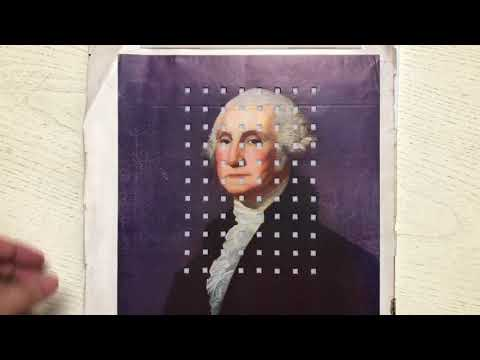

In [2]:
YouTubeVideo('U1KiC0AXhHg')

Except we'll use this image instead

In [3]:
raw = cv2.imread('images/hannibal.png')
raw = cv2.cvtColor(raw, cv2.COLOR_BGR2RGB)

In [4]:
raw.shape

(500, 500, 3)

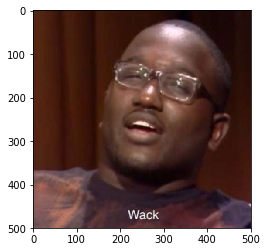

In [5]:
plt.imshow(raw);

## Determining Grain

So this is the image we started with

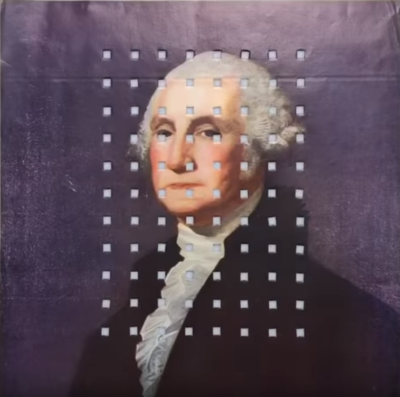

In [6]:
Image('images/washington_punched.png')

We want to figure out the ratio of punches to not punches

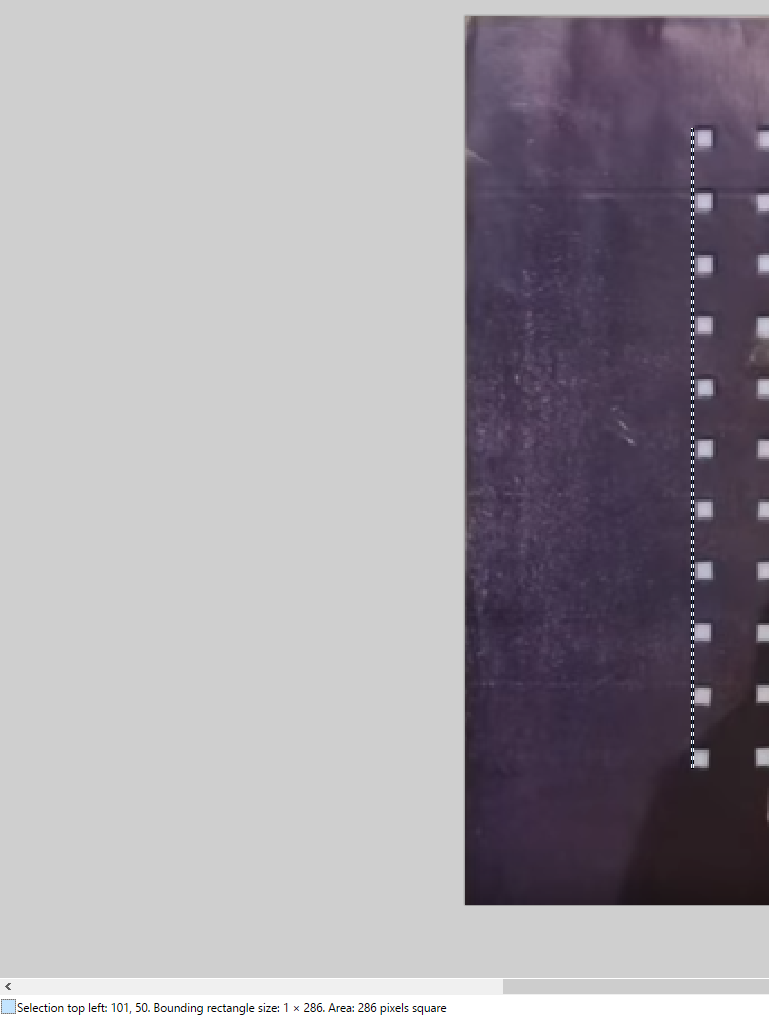

In [7]:
Image('images/washington_total_height.PNG')

The height of all of the boxes is 286

- 11 boxes, 10 blank spaces
- Boxes are about 10 high

In [8]:
(290 - (10 * 11)) / 10

18.0

We'll say the blank spaces are about 20. Cool

### Thus

Toss 20, keep 10

#### Specify where to take the punched squares

In [10]:
print(raw.shape)
raw_h, raw_w, _ = raw.shape

(500, 500, 3)


In [11]:
def messy_iterator():
    '''Mask iterator?'''
    while True:
        for i in range(20):
            yield 0
        for j in range(10):
            yield 1

In [12]:
mask = []

for y, mask_val in zip(range(raw_h), messy_iterator()):
    mask.append(mask_val)
        
assert len(mask) == 500
mask = np.array(mask)

In [13]:
mask.shape

(500,)

We want `mask` to be 500 x 500

In [14]:
mask[:5]

array([0, 0, 0, 0, 0])

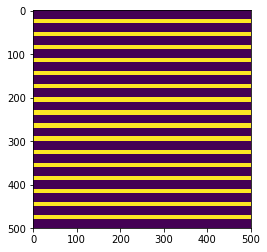

In [15]:
repeated = np.repeat(mask, repeats=500).reshape(500, 500)
plt.imshow(repeated)

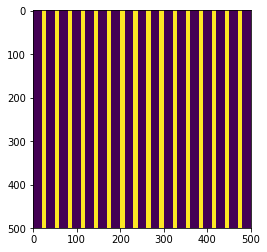

In [16]:
plt.imshow(repeated.T)

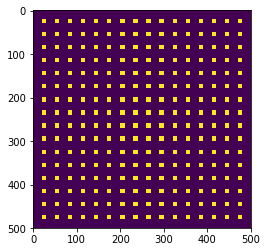

In [17]:
final_mask = repeated & repeated.T
plt.imshow(final_mask)

All of the pixels we need are here. Just need to reshape them correctly

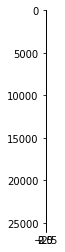

In [18]:
masked_raw = raw[final_mask.astype(bool)]
plt.imshow(masked_raw)

In [19]:
masked_raw.shape

(25600, 3)

160 * 160 = 25600

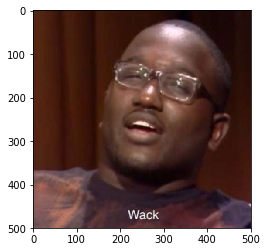

In [20]:
plt.imshow(raw)

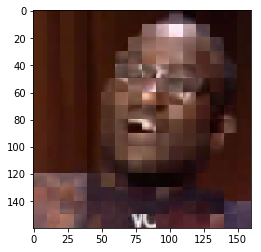

In [21]:
sprite = masked_raw.reshape(160, 160, 3)

plt.imshow(sprite)